# SENTIMENT ANALYSIS OF TWITTER TWEETS USING SEMANTIC ANALYSIS

### Importing Libraries

In [5]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from sklearn import metrics
from scipy.stats import norm
from textblob import TextBlob
from sklearn.metrics import accuracy_score
from math import sqrt
from nltk.stem import PorterStemmer 

### Data Reading

In [6]:
df=pd.read_csv(r'C:\Users\Admin\CD Project\Data.csv',encoding = 'latin',header=None,names=['target','id','time','query','user','tweet'])

In [7]:
df.head()

,target,id,time,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
df['tweet']

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: tweet, Length: 1600000, dtype: object

In [9]:
df = df[['target','tweet']]
df['target'] = df['target'].replace(4,1)

In [10]:
df.head()

,target,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


### Data Distribution

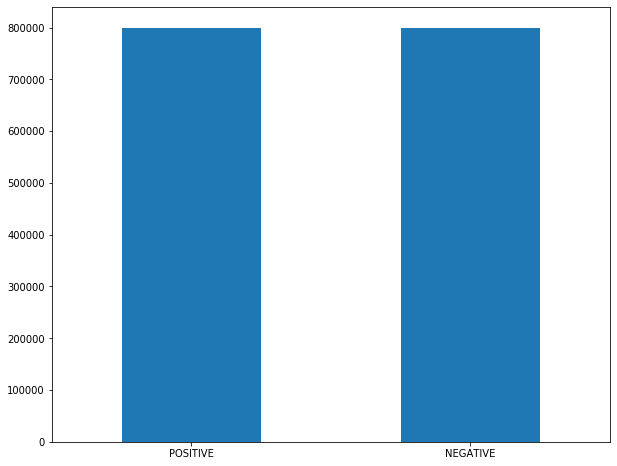

In [11]:
mapping = {0: "NEGATIVE",1: "POSITIVE"}
def sentiment(label):
    return mapping[int(label)]
df.target = df.target.apply(lambda x: sentiment(x))
count_classes = pd.value_counts(df['target'], sort = True)
count_classes.plot(kind = 'bar', rot=0)

In [12]:
text, sentiment = df['tweet'], df['target']

In [13]:
sentiment

0          NEGATIVE
1          NEGATIVE
2          NEGATIVE
3          NEGATIVE
4          NEGATIVE
             ...   
1599995    POSITIVE
1599996    POSITIVE
1599997    POSITIVE
1599998    POSITIVE
1599999    POSITIVE
Name: target, Length: 1600000, dtype: object

## Semantic Part

In [14]:
import re
from nltk.stem import WordNetLemmatizer
wordLemm = WordNetLemmatizer()
def preprocess_tweet(data):
    preprocessed=[]
    for tweet in data:
        tweet=re.sub(r'@[A-Za-z0-9]+'," ",tweet) 
        tweet=re.sub(r'^[A-Za-z0-9.!?]+'," ",tweet) 
        tweet=re.sub(r'https?://[A-Za-z0-9./]+'," ",tweet) 
        tweet=re.sub(r' +'," ",tweet)
        tweet = tweet.lower()
        tweet = re.sub(r"\'s", " ", tweet)
        tweet = re.sub(r"\'ve", " have ", tweet)
        tweet = re.sub(r"can't", "cannot ", tweet)
        tweet = re.sub(r"n't", " not ", tweet)
        tweet = re.sub(r"\'d", " would ", tweet)
        tweet = re.sub(r"\'ll", " will ", tweet)
        tweet = re.sub(r"\'scuse", " excuse ", tweet)
        tweet = tweet.strip(' ')
        tweet = tweet.strip('. .')
        tweet = tweet.replace('.',' ')
        tweet = tweet.replace('-',' ')
        tweet = tweet.replace("’", "'").replace("′", "'").replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")
        tweet = tweet.replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")
        tweet = tweet.replace("€", " euro ").replace("'ll", " will")
        tweet = tweet.replace("don't", "do not").replace("didn't", "did not").replace("im","i am").replace("it's", "it is")
        tweet = tweet.replace(",000,000", "m").replace("n't", " not").replace("what's", "what is")
        tweet = tweet.replace(",000", "k").replace("'ve", " have").replace("i'm", "i am").replace("'re", "are")
        tweet = tweet.replace("he's", "he is").replace("she's", "she is").replace("'s", " own")
        tweet = re.sub('\s+', ' ', tweet)

        tweetwords = ''
        for word in tweet.split():
            if len(word)>1:
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
        preprocessed.append(tweetwords)
    return preprocessed

In [15]:
processedtext = preprocess_tweet(text)
processedtext

['awww, that bummer you shoulda got david carr of third day to do it ;d ',
 'upset that he can not update his facebook by texting it and might cry a result school today also blah! ',
 'dived many ti ames for the ball managed to save 50 percent the rest go out of bound ',
 'whole body feel itchy and like it on fire ',
 'no, it not behaving at all am mad why am here? because can not see you all over there ',
 'not the whole crew ',
 'hug ',
 'hey long ti ame no see! yes rain bit ,only bit lol am fine thanks how you ',
 '_k nope they did not have it ',
 'que me muera ',
 'break in plain city it snowing ',
 'just re pierced my ear ',
 'could not bear to watch it and thought the ua loss wa embarrassing ',
 'it it counts, idk why did either you never talk to me anymore ',
 'would have been the first, but did not have gun not really though, zac snyder just doucheclown ',
 'wish got to watch it with you!! miss you and how wa the premiere?! ',
 'death scene will hurt me severely to watch on fil

In [16]:
processedtext=np.array(processedtext)
processedtext.shape

(1600000,)

### Train_Test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment,test_size = 0.30, random_state = 0)

### T-Fid Vectorizer

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names())) 

No. of feature_words:  500000


In [88]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [20]:
print('Train Values')
print(X_train.shape)
print(y_train.shape)
print("------------------")
print("Test values")
print(X_test.shape)
print(y_test.shape)

Train Values
(1120000, 500000)
(1120000,)
------------------
Test values
(480000, 500000)
(480000,)


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
XGB=LogisticRegression()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [26]:
print("LogisticRegression:\n",metrics.classification_report(y_test,pred))

LogisticRegression:
               precision    recall  f1-score   support

    NEGATIVE       0.82      0.80      0.81    239877
    POSITIVE       0.81      0.82      0.81    240123

    accuracy                           0.81    480000
   macro avg       0.81      0.81      0.81    480000
weighted avg       0.81      0.81      0.81    480000



In [27]:
print("LogisticRegression ACCURACY:",metrics.accuracy_score(y_test,pred))

LogisticRegression ACCURACY: 0.8124229166666667


In [28]:
from xgboost import XGBClassifier
XGB1=XGBClassifier()
XGB1.fit(X_train,y_train)
pred1=XGB.predict(X_test)
print("XGBClassifier:\n",metrics.classification_report(y_test,pred1))

XGBClassifier:
               precision    recall  f1-score   support

    NEGATIVE       0.82      0.80      0.81    239877
    POSITIVE       0.81      0.82      0.81    240123

    accuracy                           0.81    480000
   macro avg       0.81      0.81      0.81    480000
weighted avg       0.81      0.81      0.81    480000



In [144]:
pred1=XGB1.predict(X_test)
print("XGBClassifier:\n",metrics.classification_report(y_test,pred1))

XGBClassifier:
               precision    recall  f1-score   support

    NEGATIVE       0.79      0.70      0.74    239877
    POSITIVE       0.73      0.81      0.77    240123

    accuracy                           0.75    480000
   macro avg       0.76      0.75      0.75    480000
weighted avg       0.76      0.75      0.75    480000



In [29]:
def model_e(model):
    
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
     

              precision    recall  f1-score   support

    NEGATIVE       0.82      0.80      0.81    239877
    POSITIVE       0.81      0.83      0.82    240123

    accuracy                           0.81    480000
   macro avg       0.81      0.81      0.81    480000
weighted avg       0.81      0.81      0.81    480000



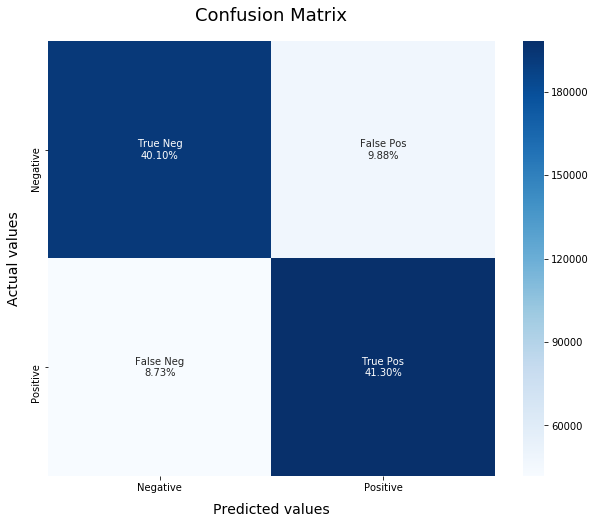

In [30]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_e(LRmodel)

In [116]:
import pickle
file = open('vectoriser-ngram-(1,2).pickle','wb')
pickle.dump(vectoriser, file)
file.close()

file = open('Sentiment-LR.pickle','wb')
pickle.dump(LRmodel, file)
file.close()

In [120]:
df2=pd.read_csv(r"C:\Users\Admin\CD Project\train.csv")
del df2['label']
del df2['id']
df2.head()

,tweet
0,@user when a father is dysfunctional and is s...
1,@user @user thanks for #lyft credit i can't us...
2,bihday your majesty
3,#model i love u take with u all the time in ...
4,factsguide: society now #motivation


In [84]:
def load_models():

    file = open(r"C:\Users\Admin\CD Project\vectoriser-ngram-(1,2).pickle")
    vectoriser = pickle.load(file)
    file.close()
    
    file = open(r'C:\Users\Admin\CD Project\Sentiment-LR.pickle')
    LRmodel = pickle.load(file)
    file.close()
    
    return vectoriser, LRmodel

def predict(vectoriser, model, text):
   
    textdata = vectoriser.transform(preprocess_tweet(text))
    sentiment = model.predict(textdata)
    
    
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
   
    df = pd.DataFrame(data, columns = ['Tweet','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

if __name__=="__main__":
   
    text =df3['Tweet']
    
    
    df = predict(vectoriser, LRmodel, text)
    df.to_csv('Output.csv')

In [38]:
df3=pd.read_csv(r'C:\Users\Admin\CD Project\Output.csv')
del df3['Unnamed: 0']
df3.head()

,Tweet,sentiment
0,@user when a father is dysfunctional and is s...,NEGATIVE
1,@user @user thanks for #lyft credit i can't us...,NEGATIVE
2,bihday your majesty,POSITIVE
3,#model i love u take with u all the time in ...,POSITIVE
4,factsguide: society now #motivation,POSITIVE


In [39]:
# df4=df3['Tweet']
# df4.to_csv('polarity.csv')
df5=pd.read_csv(r'C:\Users\Admin\CD Project\polarity.csv')
del df5['Unnamed: 0']
df5.head()

,Tweet
0,@user when a father is dysfunctional and is s...
1,@user @user thanks for #lyft credit i can't us...
2,bihday your majesty
3,#model i love u take with u all the time in ...
4,factsguide: society now #motivation


In [40]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity if analysis.sentiment.polarity >= 0 else analysis.sentiment.polarity

df5['polarity'] = df5['Tweet'].apply(lambda text: fetch_sentiment_using_textblob(text))
df5

,Tweet,polarity
0,@user when a father is dysfunctional and is s...,-0.500000
1,@user @user thanks for #lyft credit i can't us...,0.200000
2,bihday your majesty,0.000000
3,#model i love u take with u all the time in ...,0.976562
4,factsguide: society now #motivation,0.000000
...,...,...
31957,ate @user isz that youuu?ðððððð...,0.000000
31958,to see nina turner on the airwaves trying to...,0.400000
31959,listening to sad songs on a monday morning otw...,-0.500000
31960,"@user #sikh #temple vandalised in in #calgary,...",0.000000


In [41]:
df6=pd.read_csv(r"C:\Users\Admin\CD Project\Multilanguage.csv")
df6.head()

,Tweet ID,Country,Date,Tweet,Definitely English,Ambiguous,Definitely Not English,Code-Switched,Ambiguous due to Named Entities,Automatically Generated Tweets
0,4.342160e+17,TR,2014-02-14,Bugün bulusmami lazimdiii,0,0,1,0,0,0
1,2.859030e+17,TR,2013-01-01,Volkan konak adami tribe sokar yemin ederim :D,0,0,1,0,0,0
2,2.859480e+17,NL,2013-01-01,Bed,1,0,0,0,0,0
3,2.859660e+17,US,2013-01-01,I felt my first flash of violence at some fool...,1,0,0,0,0,0
4,2.860580e+17,US,2013-01-01,Ladies drink and get in free till 10:30,1,0,0,0,0,0


In [42]:
df6=df6['Tweet']

In [43]:
df6.to_csv('tweet.csv')

In [80]:
df7=pd.read_csv(r"C:\Users\Admin\CD Project\tweet.csv")

In [83]:
df7.head()
# del df7['Unnamed: 0']
df7.head()

,Tweet
0,Bugün bulusmami lazimdiii
1,Volkan konak adami tribe sokar yemin ederim :D
2,Bed
3,I felt my first flash of violence at some fool...
4,Ladies drink and get in free till 10:30


In [46]:
df3=pd.read_csv(r'C:\Users\Admin\CD Project\OutputMult.csv')
del df3['Unnamed: 0']
df3.head()

,Tweet,sentiment
0,Bugün bulusmami lazimdiii,POSITIVE
1,Volkan konak adami tribe sokar yemin ederim :D,POSITIVE
2,Bed,POSITIVE
3,I felt my first flash of violence at some fool...,NEGATIVE
4,Ladies drink and get in free till 10:30,POSITIVE


### Translate and checking polarity scores

In [79]:
analysis = TextBlob('모두 @airways와 함께 비행하지 마십시오. 끔찍한 경험을했습니다.​')
analysis=analysis.translate(to='en')
print(analysis)
analysis.sentiment.polarity


Don't all fly with @airways. Had a terrible experience.


-0.09999999999999998

### END!!!!  